In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
os.chdir('../../')
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [2]:
base_year = 2022
catastrophes = ["GCIL", "ASRS"]
crops = ["Wheat", "Rice", "Soya beans", "Maize"]

crop_scenarios = {}
for crop in crops:
    scenarios = []
    base = PyTradeShifts(
        crop=crop,
        base_year=base_year,
        region="Global",
        testing=False,
        cd_kwargs={"seed": 2},
        make_plot=False,
        keep_singletons=True
    )
    scenarios.append(base)

    for catastrophe in catastrophes:
        if catastrophe == "ASRS":
            if crop == "Wheat":
                xia_naming = "swheat"
            elif crop == "Rice":
                xia_naming = "rice"
            elif crop == "Soya Beans":
                xia_naming = "soy"
            elif crop == "Maize":
                xia_naming = "corn"


            crop_catastrophe = PyTradeShifts(
                crop=crop,
                base_year=base_year,
                region="Global",
                testing=False,
                cd_kwargs={"seed": 2},
                make_plot=False,
                keep_singletons=True,
                scenario_file_name=f"nuclear_winter/xia_37tg_y3_{xia_naming}.csv",
                scenario_name=catastrophe,
            )
        else:
            if crop == "Soya beans":
                crop_name = "Soybean"
            elif crop == "Maize":
                crop_name = "Corn"
            else:
                crop_name = crop
            crop_catastrophe = PyTradeShifts(
                crop=crop,
                base_year=base_year,
                region="Global",
                testing=False,
                cd_kwargs={"seed": 2},
                make_plot=False,
                keep_singletons=True,
                scenario_file_name="losing_industry/"+crop_name+"2mean_values.csv",
                scenario_name=catastrophe,
            )
        scenarios.append(crop_catastrophe)
    crop_scenarios[crop] = scenarios


Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Keeping communities with only one country.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario GCIL.
Built trade graph.
Found 6 trade communities.
Keeping communities with only one country.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario ASRS.
Built trade graph.
Found 7 trade communities.
Keeping communities with only one country.
The duplicates are the foll

In [3]:
crop_comparison ={}
for crop in crops:
    print(crop)
    crop_comparison[crop] = Postprocessing(crop_scenarios[crop])

Wheat
Starting postprocessing computations...


ERROR 1: PROJ: proj_create_from_database: Open of /home/florian/miniforge3/envs/pytradeshifts/share/proj failed


Rice
Starting postprocessing computations...
Soya beans
Starting postprocessing computations...
Maize
Starting postprocessing computations...


In [4]:
crop_network_df = {}
for crop in crops:
    # Create an empty dataframe
    network_df = pd.DataFrame(columns=['Scenario', "Country", 'Jaccard Distance', 'Imports Relative Difference'])
    for i, catastrophe in enumerate(catastrophes):
        # Calculate the median for the jaccard distance
        jaccard_similarity = crop_comparison[crop].jaccard_indices[i+1]

        # Calculate the median for the imports relative difference
        imports_relative_difference = crop_comparison[crop].imports_difference[i]

        # Concat the data to the dataframe
        for country in jaccard_similarity.keys():
            temp_df = pd.DataFrame({
                'Scenario': catastrophe,
                'Country': country,
                'Jaccard Distance': jaccard_similarity[country] - 1,
                'Imports Relative Difference': imports_relative_difference[country]
            }, index=[0])
            network_df = pd.concat([network_df, temp_df], ignore_index=True)
    crop_network_df[crop] = network_df


/tmp/ipykernel_740/2769474608.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)
/tmp/ipykernel_740/2769474608.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)
/tmp/ipykernel_740/2769474608.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA col

In [5]:
crop_network_df['Wheat']

,Scenario,Country,Jaccard Distance,Imports Relative Difference
0,GCIL,Afghanistan,-0.333333,-5.889899
1,GCIL,Albania,-0.127660,-46.978737
2,GCIL,Algeria,-0.127660,-48.046784
3,GCIL,Angola,-0.033333,-45.595538
4,GCIL,Argentina,-0.033333,0.000000
...,...,...,...,...
331,ASRS,Venezuela,-0.193548,-69.994741
332,ASRS,Vietnam,-0.352941,-17.037998
333,ASRS,Yemen,-0.352941,-24.983001
334,ASRS,Zambia,-0.411765,-28.593917


In [6]:
# Go through all crops and concat all dfs in crop_network_df dict to one df
# Add a column with the crop name
network_df = pd.DataFrame(columns=['Crop', 'Scenario', "Country", 'Jaccard Distance', 'Imports Relative Difference'])
for crop in crops:
    crop_network_df[crop]['Crop'] = crop
    network_df = pd.concat([network_df, crop_network_df[crop]], ignore_index=True)
network_df

/tmp/ipykernel_740/2877447875.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, crop_network_df[crop]], ignore_index=True)


,Crop,Scenario,Country,Jaccard Distance,Imports Relative Difference
0,Wheat,GCIL,Afghanistan,-0.333333,-5.889899
1,Wheat,GCIL,Albania,-0.127660,-46.978737
2,Wheat,GCIL,Algeria,-0.127660,-48.046784
3,Wheat,GCIL,Angola,-0.033333,-45.595538
4,Wheat,GCIL,Argentina,-0.033333,0.000000
...,...,...,...,...,...
1387,Maize,ASRS,Venezuela,-0.823529,-50.290254
1388,Maize,ASRS,Vietnam,-0.534884,-35.152450
1389,Maize,ASRS,Yemen,-0.534884,-40.948186
1390,Maize,ASRS,Zambia,-0.821429,-32.655170


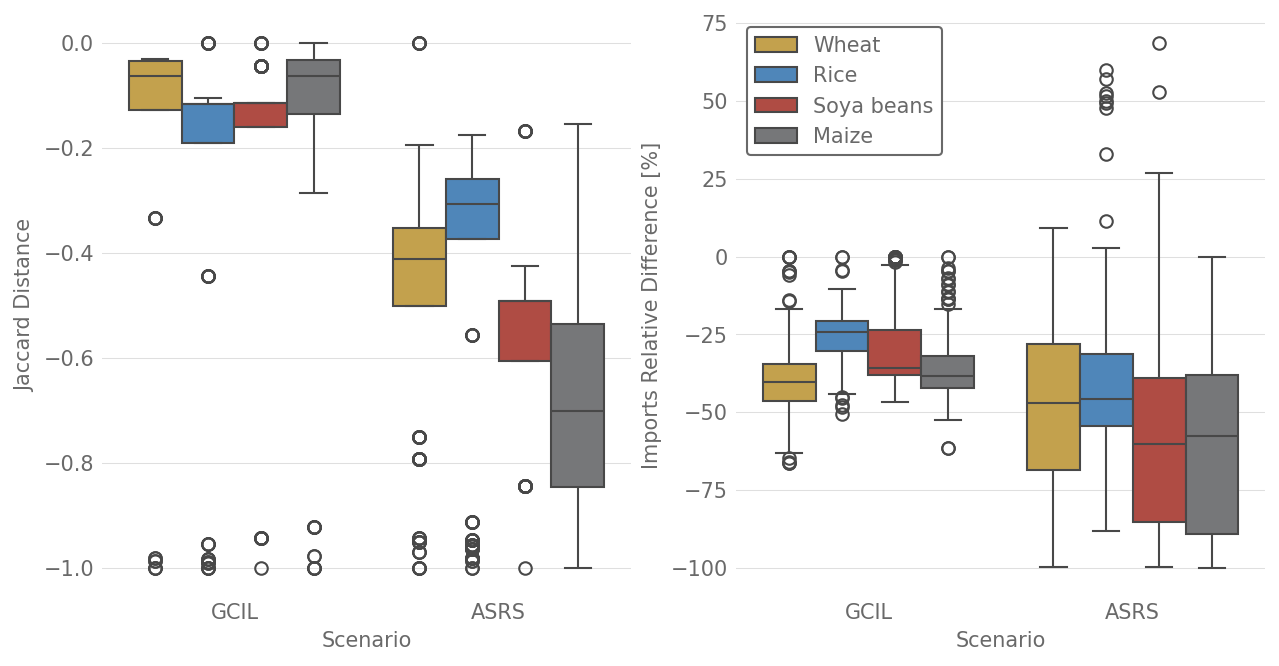

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='Scenario', y='Jaccard Distance', hue="Crop", data=network_df, ax=axes[0], palette= ["#d6a93a", "#3D87CB", "#c13d32", "#75777a"])
sns.boxplot(x='Scenario', y='Imports Relative Difference', hue="Crop", data=network_df, ax=axes[1], palette= ["#d6a93a", "#3D87CB", "#c13d32", "#75777a"])
axes[0].get_legend().remove()
axes[1].set_ylabel('Imports Relative Difference [%]')
# place the legend in the lower left corner for the first plot
axes[1].legend(loc='upper left')


In [8]:
dfs_list = []
catastrophes = ["GCIL", "ASRS"]
crops = ["Wheat", "Rice", "Soya beans", "Maize"]
# Compare the overall yield decline for the different scenarios
for catastrophe in catastrophes:
    print(catastrophe)
    for crop in crops:
        print(crop)
        if catastrophe == "ASRS":
            if crop == "Wheat":
                crop_name = "swheat"
            elif crop == "Rice":
                crop_name = "rice"
            elif crop == "Soya Beans":
                crop_name = "soy"
            elif crop == "Maize":
                crop_name = "corn"
            data = pd.read_csv(f"data{os.sep}scenario_files{os.sep}nuclear_winter{os.sep}xia_37tg_y3_{crop_name}.csv")
            data["Crop"] = crop

        else:
            if crop == "Soya beans":
                crop_name = "Soybean"
            elif crop == "Maize":
                crop_name = "Corn"
            else:
                crop_name = crop
            data = pd.read_csv(f"data{os.sep}scenario_files{os.sep}losing_industry{os.sep}{crop_name}2mean_values.csv")
            data["Crop"] = crop

        data.columns = ["Country", "Yield Relative Change", "Crop"]
        data["Scenario"] = catastrophe
        dfs_list.append(data)

df = pd.concat(dfs_list, axis=0)
df.head()

GCIL
Wheat
Rice
Soya beans
Maize
ASRS
Wheat
Rice
Soya beans
Maize


,Country,Yield Relative Change,Crop,Scenario
0,Japan,-16.577032,Wheat,GCIL
1,Poland,-51.244724,Wheat,GCIL
2,Armenia,-31.690934,Wheat,GCIL
3,Jordan,0.000000,Wheat,GCIL
4,Moldova,-32.365826,Wheat,GCIL


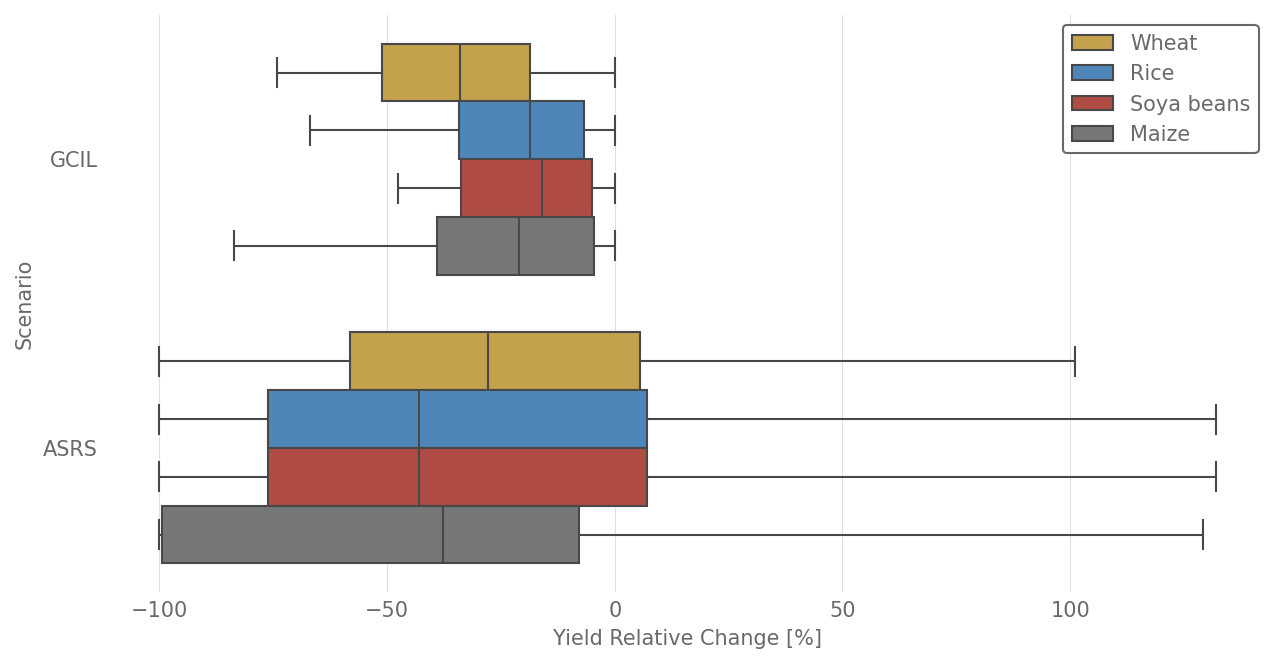

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(y='Scenario', x='Yield Relative Change', hue="Crop", data=df, ax=ax, palette= ["#d6a93a", "#3D87CB", "#c13d32", "#75777a"])
ax.get_legend().remove()
ax.set_xlabel("Yield Relative Change [%]")
# place the legend in the lower left corner for the first plot
ax.legend()